In [16]:
# Import some libraries from python and set some defaults
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.image as mpimg
import sys
import os
import time
sys.path.append(os.getcwd())
from scipy import stats
import pickle
import copy
#set the font size for plots
plt.rcParams.update({'font.size': 17})
params = {'axes.labelsize': 16, 'axes.titlesize': 16}
plt.rcParams.update(params)
rc('animation', html='html5')

In [17]:
from ipywidgets import widgets, interact, interactive, fixed
from ipywidgets import Button, HBox, VBox
import shelve
assessmentName="test";
import os

def get_last_value(key):
    if os.path.isfile('.choices.shelve') or os.path.isfile('.choices.shelve.dir'):
        s=shelve.open('.choices.shelve')
        return s.get(key,None)
    return None


class myRadioButton:
    def __init__(self,name,description,options):
        self.name=name
        self.options=options
        self.description=description
    def getWidget(self):
        def on_value_change(change):
            s=shelve.open('.choices.shelve')
            key=self.getKey()
            s[key]=change['new']
            s.close()

        self.widget=widgets.RadioButtons(
            options=self.options,
            value=get_last_value(self.getKey()),
            description=self.description,
            disabled=False
        )
        self.widget.observe(on_value_change, names='value')

        return self.widget
    def getKey(self):
        return '{0}_{1}'.format(assessmentName,self.name)
        
        
def on_value_change(change):
                s=shelve.open('.choices.shelve')
                key='{0}_{1}_{2}'.format(assessmentName,self.name,i)
                s[key]=change['new']
                s.close()

def make_value_change_fn(assessmentName,name,i):
        def fn(change):
            s=shelve.open('.choices.shelve')
            key='{0}_{1}_{2}'.format(assessmentName,name,i)
            s[key]=change['new']
            s.close()
        return fn

class myCheckBoxSet:
    def __init__(self,name,description,options):
        self.name=name
        self.options=options
        self.description=description
    def getWidget(self):
        keys=['{0}_{1}_{2}'.format(assessmentName,self.name,i) for i in range(len(self.options))]    
        self.widgets=[ widgets.Checkbox(value=get_last_value(key),
    description=o,
    disabled=False
        ) for key,o in zip(keys,self.options)]
        
        txt=widgets.HTMLMath(
            value=self.description,
            placeholder='',
            description='',
        )

        
        self.widget=VBox([txt]+self.widgets)
        for i,w in enumerate(self.widgets):
            w.observe(make_value_change_fn(assessmentName,self.name,i), names='value')

        return self.widget
import mywidgets    


# Preamble: workshop notebooks

Work through this notebook cell by cell.

When working on your solution, you can save the notebook as many times as you like. You can also submit 
as many times as you like. In fact, it is a good idea to save and submit often.

**Validate** the notebook before submitting. Use the *validate* button in the browser

**Do not copy or delete one of the original cells**. Doing so means you cannot validate the notebook.
If required, *create a new cell*, and copy the *contents* of another cell.


**Only the last submission before the deadline** will be marked.
Note that you have to **submit** at least once for your work to be marked.


The notebook contains cells with code. Some of the code is (intentionally) missing. Please insert appropriate code below the line 'YOUR CODE HERE'. Cells which do not contain any 'YOUR CODE HERE' lines will allow you to test your code; if they return an error there is something wrong with your implementation; if they do not return an error your code might be correct (it is unfortunately not possible to check for every possible error).

Note:

simply add numerical value in a dropbox for it to get marked

when asked for true/false in a box:

ticking a box means True
not ticking (or ticking an even number of times) yields False


# Workshop 7: Cluster growth and percolation

## 1) Cluster growth

### The cell below defines the Cluster class. Complete the methods that are only partially implemented.

You can the use the following cells to test your implementation.

Completing the class `Cluster` is the main aim of the first part. Some parts of the methods need to be completed.
The cells below it take you through this, one method at a time. There are also some cells to verify your implementation.

The main components of an instance of the class are:
 - ndim: the dimension of the cluster. We only examine the special case of ndim=2
 - periodic: if True, impose periodic boundary conditions, else, impose isolated boundary conditions
 - size: the extent of a cluster in any dimension
 - grid: a dictionary of positions currently occupied by the cluster, in the form of tuples
      for example ((0,1): True) if element (0,1) is part of the cluster
 - boundary: a dictionary of nearest-neighbours of cluster elements, that are not occupied
 - offsets: a list of all neigbours of location (0,0)
     - for ndim=2, the list of nearest-neighbour locations is [(1,0), (-1,0), (0,1), (0,-1)]
 
"Periodic boundry conditions" means that location (0,0) neighbours locations (1,0), (0,1) but in addition also
locations $(L-1,0)$ and $(0,L-1)$, where $L$ is the linear size of the lattice. Of the boundary conditions are not periodic, then the neighbours of location (0,0) are only (1,0) and (0,1). 


In [9]:
offsets = []
ndim = 2
for dim in range(ndim):
    offset = np.zeros(ndim, dtype=int)
    offset[dim] = 1
    offsets.append(tuple(offset))
    offsets.append(tuple(-offset))
noffsets = len(offsets) 
print(offsets)



        # input:   position: location for which we want a list of nearest-neighbours
        # output:  neighbours: a list of tuples that are valid neighbours of position

 
        # You may want to use self.offsets to 
        #    create the list of all nearest-neighbours position
        # Note: Adding tuples does not give you the offset that is required. Instead, you must
        #       convert the tuple to an array to compute the offset position first, for example as
        #           new_neighbour = np.asarray(position) + offset,
        #       but make sure to convert it back to a tuple before adding it to the list of neighbours
        #           neghbours.append(new_neighbour)
        #       You must also make sure that new_neighbour is on the grid, and, if periodic, is correcty wrapped
neighbours = []
        # YOUR CODE HERE
position = [(2,2)]

#neighbours.append(tuple(np.asarray(position) + np.asarray(offsets)))
x = np.asarray(position) + np.asarray(offsets)

#neighbours.tolist(neighbours)
neighbours.append(x)
print(x)
temp = map(tuple, x)
print(tuple(x))
print(neighbours)


[(1, 0), (-1, 0), (0, 1), (0, -1)]
[[3 2]
 [1 2]
 [2 3]
 [2 1]]
(array([3, 2]), array([1, 2]), array([2, 3]), array([2, 1]))
[array([[3, 2],
       [1, 2],
       [2, 3],
       [2, 1]])]


In [10]:
class Cluster:
    # initialize the cluster
    def __init__(self, ndim=2, size=32, random_number_seed=-1, periodic=False):
        self.size     = size             # linear extent of the lattice
        self.ndim     = ndim             # dimensionality
        self.periodic = periodic         # if True: use periodic boundary conditions, else use isolated boundary conditions
        self.grid     = {}               # the grid will store all the tuples that correspond to occupied locations
        self.boundary = None              
        
        # Initialize random number generator if random_number_seed is > 0
        if random_number_seed > 0:
            np.random.seed(random_number_seed)
        else:
            np.random.seed(None)
            
        # create list of all nearest neighbours of element (0,) * ndim
        self.offsets = []
        for dim in range(self.ndim):
            offset = np.zeros(ndim, dtype=int)
            offset[dim] = 1
            self.offsets.append(tuple(offset))
            self.offsets.append(tuple(-offset))
        self.noffsets = len(self.offsets)     
            
    #  The function return True / False depending on whether position is inside / outside the grid    
    def element_inside(self, position):
        # input: location "position" to be tested
        # output: True if position is on the lattice, False if position is not on the lattice
        if self.periodic:
            return True                                     # all positions are part of the lattice
        sp = np.array(position)
        return (sp >= 0).all() and (sp < self.size).all()   # test whether each coordinate is in the range [0, L[
                                                            # where L=self.size is the size of the lattice

    # This function adds the element at location "position" to the cluster.
    #   It returns an exception 
    #       - if that element is already in the cluster, or
    #       - if it outside the grid's boundaries
    def element_add(self, position):
        # This routine adds the element at location "position" to the cluster
        #    if the element is already part of the cluster, raise an exception
        #    if periodic=True: wrap position periodically before inserting element
        #    if periodc=False: raise exception if element is outside the grid boundaries
        pos = np.array(position)

        if self.periodic:
            pos  = (pos + 2 * self.size) % self.size     # apply periodic boundary conditions
            
        if(self.element_inside(pos)):
            if tuple(pos) in self.grid:
                print(" ++ element_add, Position = ", pos)
                raise Exception("Element is already in cluster")
            else:
                self.grid[tuple(pos)] = True
        else:
            print(" ++ element_add, Position = ", pos)
            raise Exception("Element is outside of grid")
    
    # The function returns the list of all nearest-neighbours of a given position, that are inside the grid
    def element_neighbours(self, position):
        # input:   position: location for which we want a list of nearest-neighbours
        # output:  neighbours: a list of tuples that are valid neighbours of position

        # consistency check:
        if len(position) != self.ndim:
            raise Exception(" Error: this position does not have the right dimension")
            
        # You may want to use self.offsets to 
        #    create the list of all nearest-neighbours position
        # Note: Adding tuples does not give you the offset that is required. Instead, you must
        #       convert the tuple to an array to compute the offset position first, for example as
        #           new_neighbour = np.asarray(position) + offset,
        #       but make sure to convert it back to a tuple before adding it to the list of neighbours
        #           neghbours.append(new_neighbour)
        #       You must also make sure that new_neighbour is on the grid, and, if periodic, is correcty wrapped
        neighbours = [np.asarray(position) + np.asarray(offset) for offset in self.offsets]
        # YOUR CODE HERE
        
        if self.periodic:
            neighbours = [n % self.size for n in neighbours]
        else:
            neighbours = [n for n in neighbours if self.element_inside(n)]
        
        neighbours = [tuple(n) for n in neighbours]
          
         
        #raise Exception("Element is outside of grid")        
        return neighbours

    # This function returns the distance between position1 and position2
    def distance(self, position1, position2):
        # consistency check
        if len(position1) != self.ndim:
            raise Exception("not a valid position 1 in distance")
        if len(position2) != self.ndim:
            raise Exception("not a valid position 2 in distance")
        
        #
        p = np.asarray(position1)
        q = np.asarray(position2)
        distance = 0
        for i in range(len(p)):
            dx = np.abs(p[i]-q[i])
            if self.periodic:
                if dx > self.size/2:
                    dx = self.size - dx
            distance += dx * dx
        return np.sqrt(distance)
    
    # This function returns all the distances from each element of the cluster, to the given location "position"
    def element_distances(self, position):
        distance = {}
        for element in self.grid:
            distance[element] = self.distance(element, position)
        return distance
    
    # This function periodically wraps "position" on the grid
    def periodic_wrap(self, position):
        if self.periodic:
            return tuple(np.array(position) % self.size)
        else:
            return position
        
        
        
    #########################################################################################################
    #      The three methods below implement the three models for cluster growth (Eden, DLA and Random)     #
    #########################################################################################################
    
    
    # Eden model for cluster growth
    # The algorithm for adding an element is as follows
    #  - pick at random, any unoccupied site that is a nearest neighbour of an element already in the cluster
    #  - add it to the cluster
    # The method below should add 1 element to the cluster based on this algorithm
    def Eden(self):
        
        # The first time Eden in invoked, we create a list, called self.boundary, 
        # of empty sites that neighbour the cluster
        # When Eden is called again, we update self.boundary
        if self.boundary == None:
            self.boundary = {} #should this be a list?????
            
            
            # iterate over all neighbours of all elements in the cluster
            #    if the neighbour is not in the cluster, and not in self.boundary, add it to self.boundary
            # YOUR CODE HERE
            cluster = self.grid.keys()
            for element in cluster:
                neighbours = self.element_neighbours(element)#which position to use???
                
                for neighbour in neighbours:
                    if neighbour not in cluster and neighbour not in self.boundary:
                        self.boundary[neighbour] = True #how to add elemtne to dicionary????
        #print(self.boundary)
        # pick at random an element of self.boundary, and add this element to the cluster element
        # there are several valid ways of picking an element to add
        # once you've picked an element to add, use self.element_add(element) to add it to the cluster
        # YOUR CODE HERE
        
        idx = np.random.choice(len(self.boundary.keys()))
        new_site = list(self.boundary.keys())[idx]
        self.element_add(new_site)

        # remove this element from self.boundary
        # YOUR CODE HERE
        
        del self.boundary[new_site]
        
        
        # add the neighbours of the element to self.boundary,
        #      provided they are not in the cluster, and not already in the boundary
        for neighbour in self.element_neighbours(new_site):
            if neighbour not in self.grid:
                if neighbour not in self.boundary:
                    self.boundary[self.periodic_wrap(neighbour)] = True

        # return current number of elements in the boundary             
        return len(self.boundary)
    

 
   
    # DLA model for generating a cluster
    # Start a random walk at distance "radius" away from the seed of the cluster, which is at location "centre"
    # Terminate the walk, if either
    #        walker hits the cluster - then add it to the cluster
    #        crosses the edge, i.e. reaches a distances > edge from the centre
    # DLA adds an element to cluster, and the function returns "track": the list of all sites visited in the 
    #     random walk
    
    def DLA(self, centre, radius, edge):
        start     = np.asarray(centre)
        
        #print(centre)
        #print('jbqsqv',type(centre))
        # choose starting point in polar coordinates - then convert to cartesian coordinates
        rad = radius
        if(rad < 1):
            rad = 1
        phi = 2 * np.pi * np.random.random()  # angle uniform in [0, 2pi[
        x   = rad * np.cos(phi)
        ix  = int(np.rint(x))      # convert to integer offset
        y   = rad * np.sin(phi)
        iy  = int(np.rint(y))      # convert to integer offset
        dr  = np.sqrt(x*x+y*y)
        
        # add starting offset
        start[0] += ix
        start[1] += iy
        start     = tuple(start)
        cont      = True
        
        # track stores all the location that the random walk visits
        track   = []
        track.append(start)
        step    = start   # the random walk steps from the current step, "step", to the next step, "next_step"
        while cont:
            # continue walking as long as cont = True
            
            # take a random step, from step to next_step
            # Hint: use RandomStep, implemented below, or write your own
            # YOUR CODE HERE
            """
                        itry      = np.random.choice(range(self.noffsets))
            offset    = self.offsets[itry]
            new       = tuple(np.array(position) + np.array(offset))
            next_step = self.periodic_wrap(new)
            """
            
            next_step = self.RandomStep(step)
            

            # If any neighbour of next_step is in the cluster, then:
            #    - add next_step to cluster
            #    - add next_step to track
            #    - set cont = False, to end walk
            # use self.element_add to add the element to the cluster
            # YOUR CODE HERE
            neighbours = self.element_neighbours(next_step)
            for neighbour in neighbours:
                
                if neighbour in self.grid:
                    self.element_add(next_step)
                    track.append(next_step)
                    #print('next-step', next_step)
                    cont = False
                
            # if cont is True, we need to check if walker is still in the allowed region
            #     if distance to centre > edge: put cont = False, add element to track, and end walk
            #     if distance to centre < edge: cont = True
            #         - add next_step to track
            #         - put step = next_step
            #         - continue walk
            # YOUR CODE HERE
            
            distance = np.sqrt(np.sum((np.asarray(next_step) - np.asarray(centre)) ** 2))
            distance = self.distance(self, new_step, centre)
            #print('centre', centre , 'next step',next_step, 'distance', distance)
            if distance > edge:
                cont = False
                track.append(next_step)
                
            else: 
                track.append(next_step)
                step = next_step # why do this
             
                
            
            
        # walk finished: return the track 
        # You may want to uncomment the lines below for debugging your code
        #if attach:
        #    print("Walker attached to cluster at position = ", next_step)
        #else:
        #    print("walker off grid")
            

        #print(track)
        return track

    # This function randomly adds sites to a grid, based on comparing a uniform random number, prob,
    #      to the input (given) probability "probability"
    def Random(self, probability):
        # for each site: if random number < probability, add element to cluster
        self.p = probability
        shape  = (self.size,) * self.ndim
        prob   = np.random.rand(*shape)
        assign = np.where(prob < probability)
        assign = np.array(assign).T
        for a in assign:
            self.element_add(a)
            
    #########################################################################################################
    #   The routines below are helper routines  #
    #########################################################################################################

    # Perform a single random step, starting at location "position"
    #     function returns the location of the end of the step
    def RandomStep(self, position):
        itry      = np.random.choice(range(self.noffsets))
        offset    = self.offsets[itry]
        new       = tuple(np.array(position) + np.array(offset))
        return self.periodic_wrap(new)

    
    # Starting from location "position", take nstep random walk steps
    def RandomWalk(self, position, nstep):
        track   = []
        current = position
        for i in range(nstep):
            current  = self.RandomStep(current)
            track.append(current)
        return track
    
    # Plot the current cluster
    #   Input is the cut to plot, and, optionally, the name of the plot, and the name of the file
    #   to save the plot
    def ShowCluster(self, cut, title=None, file=None):
        # extract the cooridnates of the cluster specified by cut 
        xs, ys  = self.ExtractSlice(cut)
        # create the figure, and plot all cluster sites
        fig, ax = plt.subplots(figsize=(7,7))
        ax.set_aspect('equal')
        ax.set_xlim(-1, self.size)
        ax.set_ylim(-1, self.size)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        if not title == None:
            ax.set_title(title)
        ax.grid()
        ax.plot(xs,ys,'ro',alpha=0.2)[0]
        
        # save the figure
        if not file == None:
            print("Saving cluster to file: ", file)
            plt.savefig(file)
            
        fig.show()
        
 
    # Extract a slice: this is useful if the cluster is in ndim>2 dimensions
    #    cut specifies the direction to cut the cluster and extract a 2D slice
    def ExtractSlice(self, cut):
        # cut is a tuple of length self.ndim
        # the tuple should have exactly 2 elements equal to -1, which define the plane to extract
        if len(cut) != self.ndim:
            raise Exception(" cut has wrong length")
        plane = np.where(np.asarray(cut) == -1)[0]
        if len(plane) != 2:
            raise Exception(" plane has wrong dimenson ", len(plane))
        for dim in range(self.ndim):
            if dim not in plane:
                if cut[dim] < 0 or cut[dim] >= self.size:
                    raise Exception(" cut is out of range ", dim, cut[dim])
        #
        sites = []
        xs    = []
        ys    = []
        cut = np.asarray(cut)
        for site in self.grid:
            if np.all(np.logical_or(cut==-1,cut==np.asarray(site))):
                sites.append(site)
                xs.append(site[plane[0]])
                ys.append(site[plane[1]])
        return xs, ys        
                
    # This function plots a track, as generated by DLA for example, for a given random walk
    #  Input is the track, and optionally, the name of the file to save the figure
    def ShowTrack(self, track, file=None):

        fig, ax = plt.subplots(figsize=(7,7))
        ax.set_aspect('equal')
        ax.set_xlim(-1, self.size)
        ax.set_ylim(-1, self.size)
        ax.set_xlabel("x-position")
        ax.set_ylabel("y-position")
        ax.set_title("Track of random")
        ax.grid()
        xs = []
        ys = []
        for el in track:
            xs.append(el[0]) 
            ys.append(el[1])
#        ax.plot(xs,ys,'ro',alpha=0.2)[0]
        ax.plot(xs, ys)
    
        # plot the starting position
        label = 'start'
        el = track[0]
        ax.plot(el[0], el[1], 'D', color='red',label=label)

        # plot the end position
        label = 'end'
        el = track[-1]
        ax.plot(el[0], el[1], 'D', color='cyan', label=label)
        
        ax.legend(frameon=False)
 
        # save the figure
        if not file == None:
            print("Saving track to file: ", file)
            plt.savefig(file)
            
        plt.show()  
    

### The cells below, test your implementation of methods in Cluster

If your code does not pass this cell, you should debug your implementation of element_add before continuing

In [11]:
# initialize a small cluster
size     = 5          # size of cluster
ndim     = 2          # dimensionallity of cluster
periodic = True       # boundary condition
cluster  = Cluster(ndim=ndim, size=size, periodic=periodic)

# add a single element at the centre
cent = int(size/2)          # location of seed
seed = (cent,) * ndim       # seed of cluster
cluster.element_add(seed)

# Provided your implementation is correct, cluster.grid = {{2,2)}: True}
test = {(2,2): True}
if cluster.grid == test:
    print("That's right! -- continue")
else:
    print("you made and error in the Eden model")

# Using the list of offsets, add the neighbour to the right of the seed to the cluster
offset  = cluster.offsets[0]
element = tuple(np.asarray(seed) + np.asarray(offset))
print("We are adding element = ", element)
cluster.element_add(element)
test2 = {(2, 2): True, (3, 2): True}
if cluster.grid == test2:
    print("That's right! -- continue")
else:
    print("you made and error in the Eden mode")

# Test adding an element that is already in the cluster
try:
    cluster.element_add(seed)
    print(" this should not happen: element should not be added twice ")
except:
    print("That's right! -- continue")
    pass    

# Test periodic wrapping
element = (2*size, int(size/2))  # this element is outside of the grid, but we are using periodic boundary conditions
print("We are adding element = ", element)
cluster.element_add(element)
test3 = {(2, 2): True, (3, 2): True, (0, 2): True}
if cluster.grid == test3:
    print("That's right! -- continue")
else:
    print("you made and error in implementing add_element (periodic boundary conditions)")

    
    
# now test non-periodic cluster
cluster  = Cluster(ndim=ndim, size=size, periodic=False)
try: 
    cluster.element_add(element)
    print(" this should not happen: element should not be added")
except:
    print("That's right! -- continue")
    pass

That's right! -- continue
We are adding element =  (3, 2)
That's right! -- continue
 ++ element_add, Position =  [2 2]
That's right! -- continue
We are adding element =  (10, 2)
That's right! -- continue
 ++ element_add, Position =  [10  2]
That's right! -- continue


In [12]:
# This cell tests your implementation of the "element_neighbours" method"

# create a small cluster and add some elements to it
size     = 7          # size of cluster
ndim     = 2          # dimensionallity of cluster
periodic = False      # boundary condition
cluster  = Cluster(ndim=ndim, size=size, periodic=periodic)

# start with seed at centre, and add all off its neighbours
cent = int(size/2)          # location of seed
seed = (cent,) * ndim       # seed of cluster
cluster.element_add(seed)
for offset in cluster.offsets:
    element = tuple(np.asarray(seed) + np.asarray(offset))
    cluster.element_add(element)

# list all neighbours of some positions
neighbours = cluster.element_neighbours(seed)
test = [(4, 3), (2, 3), (3, 4), (3, 2)]
if neighbours == test:
    print(" That's right! -- continue")
else:
    print("you made an error in implementing element_neighbours")

 That's right! -- continue


### a) The Eden model of cluster growth

Complete implementing the Eden model in the `Cluster` class.
The growth algorithm is as follows (see lecture notes)
    - at start-up, create self.boundary - a list of all valid, empty sites that are nearest-neighbours 
    of the current cluster elements (i.e. initially, the neasrest-neighbours of the cluster seed)
    - pick randomly one of the elements in the list of boundary cells, self.boundary
        - add the element to the cluster
        - remove the element from the list of boundary sites
        - update the boundary sites
        
        



(10, 10)
Saving cluster to file:  Eden.png


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


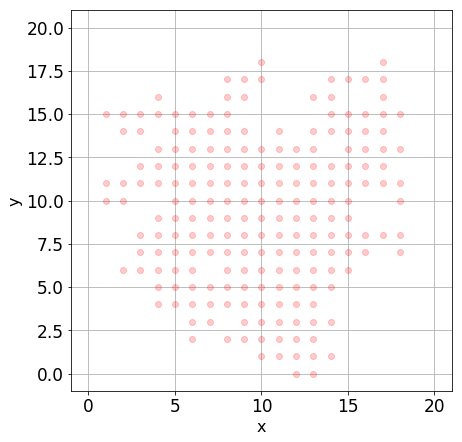

In [13]:
size     = 21         # size of cluster
ndim     = 2          # dimensionality of the cluster
periodic = False      # boundary condition
cluster  = Cluster(ndim=ndim, size=size, random_number_seed = 1, periodic=periodic)
cent     = int(size/2)
seed     = (cent,) * ndim       # seed of cluster
print(seed)
cluster.element_add(seed)
nsites = 200               # add nsites=200 elements to the Eden cluster
for i in range(nsites):
    cluster.Eden()


# Use ShowCluster to visualize the cluster. Set cut=[-1, -1]
cut   = [-1, -1]
file  = 'Eden.png'
# YOUR CODE HERE
### Nothing to add - simply run this cell
title = 'Eden cluster'
cluster.ShowCluster(cut, file=file)


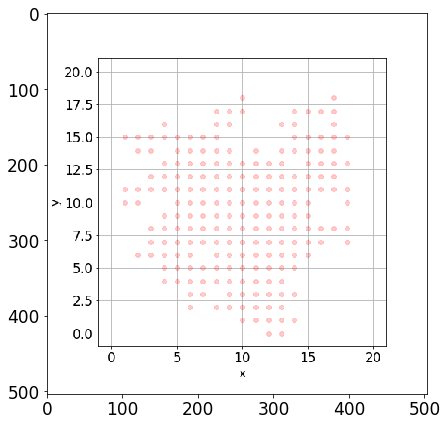

In [14]:
# You may want to compare your results to the plot below
import matplotlib.image as mpimg
img = mpimg.imread('Eden_solution.png')
fig_size = (7., 7.)
plt.figure(figsize=fig_size)
#plt.imshow(img, aspect='auto')
plt.imshow(img)
plt.show()

### Compute the fractal dimension of an Eden cluster


In the next cell:
 - Generate an Eden cluster with the parameters given (size, ndim, periodic, and location of starting seed)
 - Compute the distance of each element to the seed
 - Sort the distance in ascending order
 - Plot the enclosed mass, $M(\le r)$, as a function of radius $r$. Assume that each element has mass = 1
 - Use this to estimate the fractal dimension $d$, from $M(\le r)\propto r^d$ (ignore the seed)
 

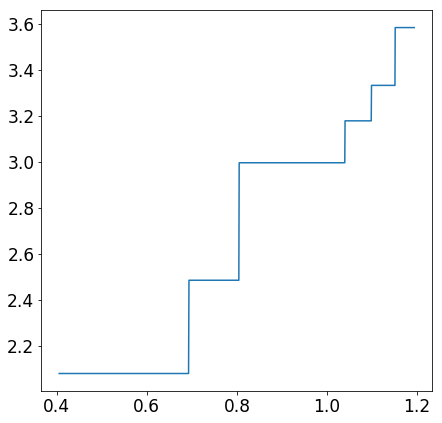

In [26]:
size       = 101                  # linear extent of lattice
ndim       = 2                    # dimensionality of lattice
periodic   = False                # non-periodic boundary conditions
cent       = int(size/2)          # location of seed
seed       = (cent,) * ndim       # seed of cluster
nsites     = 499                  # number of sites to add


# for each element of the cluster, compute the distance to the seed
# sort these distances from small to large, and remove the first element (the seed, which has distance = 0, of course)
# assume each element has mass is one, and compute the enclosed mass, M(<r), where M is mass enclosed within radius r
# Estimate the fractal dimension, d, using M=M_0 r^d
#   - hint: you may want make linear fit to log M = A + B log r, for which the slope is B=r
#           notice that the relation starts to bend (and hence is no longer linear) for large r - you may
#           want to restrict the fit to stay away from the boundary
#           I used stats.linregress to perform the linear fit
#  plot log M(<r) versus log(r), and overplot your fit. Make sure you add a legend and label the axes

# approximate marking scheme
# plot has axes labels:                                2 marks
# results from the Eden model are plotted and look OK: 4 marks
# linear fit is over plotted and looks OK:             2 marks
# the plot has a legend:                               2 marks

fig, ax = plt.subplots(1, 1, figsize=(7,7))
# YOUR CODE HERE
cluster = Cluster(ndim=ndim, size=size, random_number_seed = 1, periodic=periodic)
cluster.element_add(seed)

distance = []
for i in range(nsites):
    cluster.Eden()
    
for i in cluster.grid:
    distance.append(cluster.distance(seed , i))

distance.sort()
del distance[0]

r = np.linspace(1.5,3.3,1000)

total = [0]*len(r)

for i in range(len(r)):
    
    for j in range(len(distance)):
        if r[i]>distance[j]:
            total[i] +=1
            

ax.plot(np.log(r),np.log(total))

plt.show()

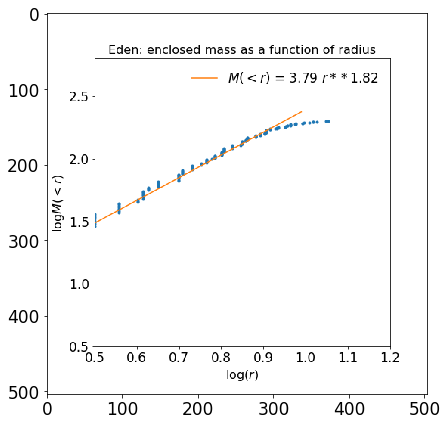

In [16]:
# You may want to compare your results to the plot below
import matplotlib.image as mpimg
img = mpimg.imread('Eden_mass.png')
fig_size = (7., 7.)
plt.figure(figsize=fig_size)
#plt.imshow(img, aspect='auto')
plt.imshow(img)
plt.show()

Now generate 2000 realisations of an Eden cluster with the parameters of the cell above.

Compute the fractal dimension $d$, defined as $m\propto r^d$, where $m$ is the mass enclosed with radius $r$,
fitting to the range $r=[5, 10]$ for each.

Plot a histogram of the values of $d$. Compute the mean value of $d$ and the standard deviation.
Over plot a Gaussian with the parameters


In [17]:

# Approximate marking scheme
# axes are correctly labelled:             2 marks
# histogram of numerical values looks OK:  4 marks
# Gaussian is over ploted and looks OK:    2 marks
# Plot has a legend:                       2 marks

# YOUR CODE HERE

print("Calculation finished")    

Calculation finished


In [18]:
# Use this cell to make the plot
# YOUR CODE HERE


In [18]:
dimen=mywidgets.myFloatBox('Percolation','P1','Dimension=', 'Enter your estimate of the mean fractal dimension to a least 3 significant figures')
dimen.getWidget()


In [19]:
# display(HTML('<hr>'))

### b) The DLA model of cluster growth

Complete the DLA growth model in the `Cluster` (see course notes). In brief, the growth algorithm is as follows:

- create a cluster with a single seed at the centre, using the `Cluster` class you've developed
- choose an inner radius, $r_1$, and an edge radius $r_2$.
    - start a random walker from a location at distance close to $r_1$ from the seed, and let it walk
        - if it hits any part of the existing cluster, add it to the cluster, and start a new walk
        - if it crosses the outer boundary, $r>r_2$, terminate the random walk, and start a new walk
- terminate the programme, when the cluster contains a specified number of elements

In the cells below, $r_1$ is referred to as the "radius" and $r_2$ as the "edge".

You may want to base the random walk on the implementation you wrote in lecture 6 on random walks
Use the cells below to test intermediate steps of this assignment

        
      

In [106]:
# create a cluster, and add a seed to the centre
size       = 101                  # the size here is only ever used for plotting
ndim       = 2                    # we only do the 2 dimensional case
periodic   = False                # non-periodic grid
cent       = int(size/2)          # put the seed in the center of the grid
seed       = (cent,) * ndim       # seed of cluster



Saving track to file:  Randomwalk.png


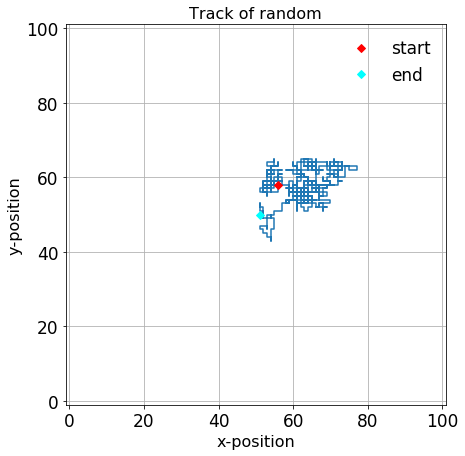

In [109]:
# as an example, perform a single walk to see what happens
centre = seed
radius = 20         # launch radius, r_1, for random walk
edge   = 40         # outer edge radius, r_2

# We specify a random number seed for this test, so you should always get the same shape of walk
dla = Cluster(ndim=ndim, size=size, random_number_seed=12, periodic=periodic)
dla.element_add(seed)
track  = dla.DLA(centre, radius, edge)
file   = "Randomwalk.png"

# YOUR CODE HERE
### Nothing to implement: simply run this cell
# the call below plots the track the random walk followed, before it terminated
#     - either by travelling further than 'edge' from the seed
#     - or by hitting the seed
dla.ShowTrack(track, file=file)

# you may want to compare your answer to the file "Randomwalk_solution.pdf"
# It should not look identical, but if it looks very different you may have a bug somewhere in your code
# Notice that in this case, the random talk is termindated because it crosses the edge radius, r_2.


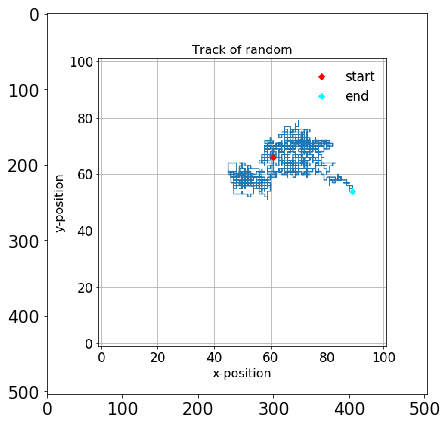

In [108]:
# You may want to compare your results to the plot below
import matplotlib.image as mpimg
img = mpimg.imread('Randomwalk_solution.png')
fig_size = (7., 7.)
plt.figure(figsize=fig_size)
#plt.imshow(img, aspect='auto')
plt.imshow(img)
plt.show()

### Creating a DLA cluster

Use the random walk model to create a DLA cluster with nel = 400 elements in it

Use the cell below it plot the DLA cluster and saving the plot to a file.

Take care with the parameter 'radius' and 'edge'.
The values in the cell below are reasonable initializations values from where to start the walk (at a distance "radius" from the centre of the DLA cluster), and for when to abort the random walk (if the walker ventures further than "edge' from the centre of the cluster). However, as the cluster grows in size, you will need to increase both "radius" and "edge".

    - If radius is too small, the centre of the cluster will be too densely filled,
        since all walkers are started too close in.
    - If edge is too small, you again get a cluster that is too centrally concentrated.
    - If edge and/or radius are too large, then the code becomes very inefficient, because the walker can run everywhere with little chance of ever hitting the cluster.

Therefore, you may want to experiment with both these parameters.

In [ ]:
# Use this cell to compute the DLA cluster (10 marks)

# These are the cluster's parameters
size     = 101                  # size of the grid is needed for plotting and setting the seed
cent     = int(size/2)          # set the seed
seed     = (cent,) * ndim       #
periodic = False                # non-periodic boundary conditions
dla      = Cluster(ndim=ndim, size=size, random_number_seed=12, periodic=periodic)
dla.element_add(seed)

# Approximate marking scheme: DLA cluster looks OK, axes are labelled

#  
centre = seed    # centre of the cluster
radius = 10      # start random walk at a distance of approximately 10 units from the centre
edge   = 20      # terminate walk if wanders further than edge units from the centre
nel    = 400     # terminate cluster growth if cluster contains nel elements

# Hint: to speed up th calculation, I found it useful to
#   to set radius to radius = max([radius, 1.d * rmax])
#       where radius is the previous radius
#             rmax is the maximum distance of a cluster element to the centre
#   to set edge to edge = max([edge, 1.7 * radius])
#       where edge is the previous value of the outer radius
#             radius is the current starting radius
#    This lets both the starting radius and the edge grwo a the cluster grows

# YOUR CODE HERE
print("Calculation is finished")




In [ ]:
# use this cell to plot your answer
cut   = [-1, -1]
title = 'DLA cluster'
file  = 'DLAcluster.png'
dla.ShowCluster(cut, title=title, file=file)

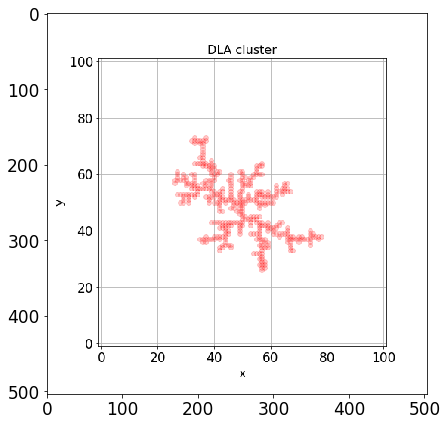

In [111]:
# You may want to compare your results to the plot below
import matplotlib.image as mpimg
img = mpimg.imread('DLAcluster_solution.png')
fig_size = (7., 7.)
plt.figure(figsize=fig_size)
#plt.imshow(img, aspect='auto')
plt.imshow(img)
plt.show()

## c) Percolation

### Identifying a cluster

The cell below defines a class `GroupFinder` that identifies groups in a cluster.

The structure of the cluster required by GroupFinder is the same as what we had so far. The `Eden` cluster and the `DLA` cluster have the right format. Given a cluster, the groupfinder partitions the elements in a cluster by making sure that any two elements of the cluster that are nearest-neighbours, belong to the same group.

How to use the `GroupFinder` is explored in the following cells.




In [114]:
# This class contains methods to
#   - identify all groups in  a given cluster
#        a group is a set of sites that are nearest-neighbours
#   - examine whether a group percolates
# You should not have to edit any of these methods
# Use the cells below to learn how to use the method to identify groups, and examine percolation
class GroupFinder():
    # return a list of connected clusters
    def __init__(self, cluster):
        self.cluster = cluster
        # Each element within a group will point to a common element of the group - the head
        self.heads   = {}
        for element in self.cluster.grid:
            self.heads[element] = element  # initialize by assuming each element is in its own group
            
    # Iteratively loop over all elements in the cluster to identify groups
    def FoF(self):
        # Begin partitioning 
        #    We only loop over pairs of neighbours
        maxcount = 10000
        for element in self.cluster.grid:
            element_head = element
            count = 0
            while element_head != self.heads[element_head] and count < maxcount:
                element_head = self.heads[element_head]
            count = 0
            for neighbour in self.cluster.element_neighbours(element)[::2]:
                count = 0
                if neighbour in self.cluster.grid:
                    neighbour_head = neighbour
                    while neighbour_head != self.heads[neighbour_head] and count < maxcount:
                        count += 1
                        neighbour_head = self.heads[neighbour_head]
                    self.heads[neighbour_head] = element_head
            if count == maxcount:
                raise Exception("Error: partitioning does not converge")

        #
        count = 0
        for element in self.cluster.grid:
            element_head = element

            while element_head != self.heads[element_head] and count < maxcount:
                element_head = self.heads[element_head]
            self.heads[element] = element_head
        
        
        unique  = {}
        ngroups = 0
        for head in self.heads:
            if head not in unique:
                unique[head] = ngroups
                ngroups     += 1
        
        groupid = []
        for element in self.cluster.grid:
            groupid.append(unique[self.heads[element]])

        return np.asarray(groupid)

    # Alternative group finder   
    def Groups(self):
        groupid    = np.arange(len(self.cluster.grid), dtype=int)
        groupindx  = {}
        for index, element in enumerate(self.cluster.grid):
            groupindx[element] = index
        success = False
        count   = 0
        while not success:
            success = True
            for element in self.cluster.grid:
                for neighbour in self.cluster.element_neighbours(element):
                    if neighbour in self.cluster.grid:
                        indx1 = groupid[groupindx[element]]
                        indx2 = groupid[groupindx[neighbour]]
                        if indx1 < indx2:
                            groupid[groupid==indx2] = indx1
                            success = False
                            count += 1
                        elif indx1 > indx2:
                            groupid[groupid==indx1] = indx2
                            success = False
                            count += 1
            print(" count = ", count)
        return groupid

    # Examine the percolation of groups identified using a group finder
    # Loop over all unique groups in groupdid
    #     for each group, loop over all dimensions
    #     if a group percolates, store its id and the dimension that it percoaltes in
    #   return this to the calling routine
    def PercolateGrid(self, groupid):
        # determine whether thisgroup percolates
        
        # consistency: only works for non-periodic grids
        if self.cluster.periodic:
            raise Exception(" We only implement non-periodic grids ")
            
        #     
        groupindx  = {}
        for index, element in enumerate(self.cluster.grid):
            groupindx[element] = index
         
        # extract group by group
        result = []
        for group in np.unique(groupid):
            newcluster = Cluster(self.cluster.ndim, self.cluster.size, self.cluster.periodic)
            for element in self.cluster.grid:
                if groupid[groupindx[element]] == group:
                    newcluster.grid[element] = True 
                    
            # find whether this group percolates
            for dimen in range(self.cluster.ndim):
                if self.PercolateGroup(newcluster, dimen):
                    result.append([group, dimen])
        return result                
    
    # This method examines whether a given group percolates in a given dimension
    def PercolateGroup(self, cluster, dimen):
        # inputs:
        #    self: the class GroupFinder
        #    cluster: one of the groups identified by the group finder
        #    dimen: the dimension to check for percolation

        # consistency check
        if dimen < 0 or dimen >= cluster.ndim:
            raise Exception(" too many dimensions ")
        
        # Determine with this cluster touches both boundaries in dimension dimen of the dimensions simultaneously
        x = [sp[dimen] for sp in cluster.grid.keys()]
        return (min(x) == 0 and max(x) == cluster.size-1)

    ####### The routines below are useful for plotting groups #################
    def ExtractGroup(self, groupid, plotid, cut):
        groupindx  = {}
        for index, element in enumerate(self.cluster.grid):
            groupindx[element] = index
            
        newcluster = Cluster(self.cluster.ndim, self.cluster.size, self.cluster.periodic)
        for element in self.cluster.grid:
            if groupid[groupindx[element]] == plotid:
                newcluster.grid[element] = True
            
        xs, ys  = newcluster.ExtractSlice(cut)
        return xs, ys    
    
    def ShowGroup(self, groupid, plotid, cut):
        xs, ys = self.ExtractGroup(groupid, plotid, cut)
        ax.plot(xs, ys, 'o',alpha=0.2)[0]

   

### Examine the cell to see how the methods of GroupFinder and Cluster can be used to
 - create a cluster to work on
 - identify the groups inside the cluster
 - plot the result


In [ ]:
# set-up the grid parameters
size      = 512         # size of the lattice
ndim      = 2           # number of dimensions
periodic  = True        # periodic boundary conditions
rseed     = 12          # seed for random number generator
cluster   = Cluster(size=size, ndim=ndim, periodic=periodic, random_number_seed = rseed)

# Use the Eden model to grow some clusters on the lattice
#    starting seeds
seeds = ((50,50),(50,200),(100,50),(200,400),(300,200))
for seed in seeds:
    cluster.element_add(seed)    

# allow each cluster to grow
for i in range(10000):
    cluster.Eden()

# Now identify connected seeds
groupfinder = GroupFinder(cluster)

# Assign each element to its group. Elements of the same group have the same groupid
groupid     = groupfinder.FoF()
grouplen    = []

# Next, count the number of elements in each separate group
groups = np.arange(len(np.unique(groupid)))
for (id,group) in zip(np.unique(groupid), groups):
    count = len(np.where(groupid == id)[0])  # number of elements in this group
    grouplen.append(count)
    info = r"group = {0:1d} has id = {1:4d} and {2:3d} elements".format(group, id, count)
    print(info)
# Print some statistics    
print("Number of unique groups = ", len(np.unique(groupid)))
print("Number of elements in largest group = ", max(grouplen))

# Now plot all groups, using different colours for each group
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.set_aspect('equal')
ax.set_xlim(-1, cluster.size)
ax.set_ylim(-1, cluster.size)
ax.set_xlabel('x-position')
ax.set_ylabel('y-position')
ax.set_title(' connected groups')
ax.grid()
for id in np.unique(groupid):
    xs, ys = groupfinder.ExtractGroup(groupid, id, cut)
    ax.plot(xs, ys, ',', alpha=0.2)[0]

# over plot the starting locations
for seed in seeds:
    x = seed[0]
    y = seed[1]
    ax.plot(x, y, 'D', color='red')

plt.show()

# Description: we grew Eden clusters starting from 5 different seed locations.
#   The seeds of these clusters are indicated with the red diamonds
# Running the group finder, we identified 4 separate groups - as you can see, the green group consists
#     of 2 Eden clusters that just touch - hence they form part of a single group

We will now use the group finder to study percolation.

Begin by examining the method "Random" in the class Cluster, which has as parameter $p$, in addition to size, ndim and periodic.  In this method, we generate a random number, $r$, for each grid point of square mesh, [size, size] in extent. If $r<p$, then we add this element to the cluster.

 generating sample grid with probability =  0.2  fraction of occupied elements=  0.1968
 generating sample grid with probability =  0.4  fraction of occupied elements=  0.3932
 generating sample grid with probability =  0.6  fraction of occupied elements=  0.5944


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


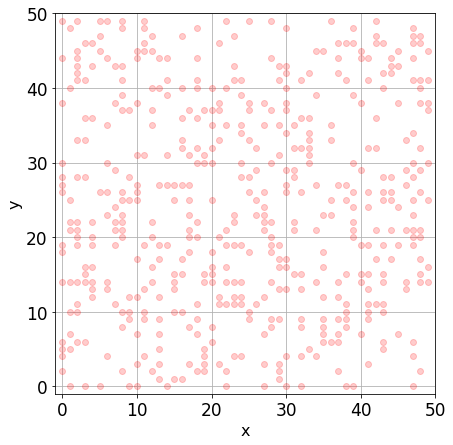

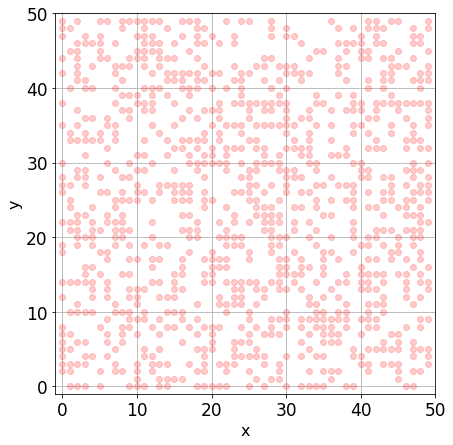

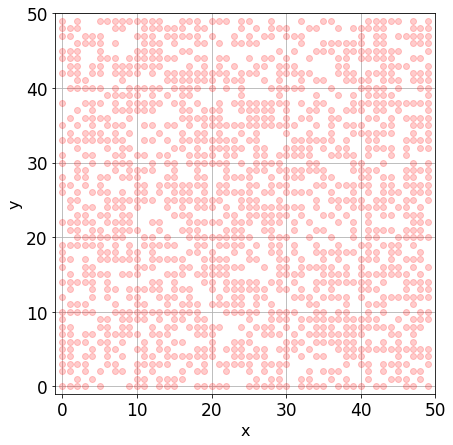

In [112]:
# Example of the method Cluster.Random for generating a cluster of points on a regular grid, with a given probability

size = 50         # size of the grid
ndim = 2          # dimensionality

# variable needed by ShowCluster
# cut = np.zeros(ndim)
# cut[0] = -1
# cut[1] = -1
# cut    = tuple(cut)
cut = [-1, -1]

# generate some with different probabilities as an example

# first example
probability = 0.2
cluster = Cluster(ndim=ndim, size=size, random_number_seed=1, periodic=False)
cluster.Random(probability)
fraction = len(cluster.grid) / float(size**ndim)
print(" generating sample grid with probability = ", probability," fraction of occupied elements= ", fraction)
cluster.ShowCluster(cut)

# second example
probability = 0.4
cluster = Cluster(ndim=ndim, size=size, random_number_seed=1, periodic=False)
cluster.Random(probability)
fraction = len(cluster.grid) / float(size**ndim)
print(" generating sample grid with probability = ", probability," fraction of occupied elements= ", fraction)
cluster.ShowCluster(cut)

# third example
probability = 0.6
cluster = Cluster(ndim=ndim, size=size, random_number_seed=1, periodic=False)
cluster.Random(probability)
fraction = len(cluster.grid) / float(size**ndim)
print(" generating sample grid with probability = ", probability," fraction of occupied elements= ", fraction)
cluster.ShowCluster(cut)




We now use the group finder to identify unique groups. As an example, we use the last cluster with $p=0.6$

Number of unique groups =  100
Biggest group =  610


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


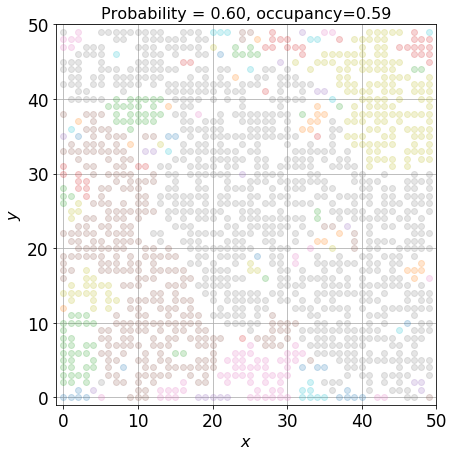

In [115]:
# we now use the group finder to identify clusters in the last last cluster as an example
groupfinder = GroupFinder(cluster)
groupid     = groupfinder.FoF()
grouplen    = []
for id in np.unique(groupid):
    grouplen.append(len(np.where(groupid == id)[0]))

print("Number of unique groups = ", len(np.unique(groupid)))
print("Biggest group = ", max(grouplen))

fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.set_aspect('equal')
ax.set_xlim(-1, cluster.size)
ax.set_ylim(-1, cluster.size)
ax.grid()
for id in np.unique(groupid):
    xs, ys = groupfinder.ExtractGroup(groupid, id, cut)
    ax.plot(xs, ys, 'o', alpha=0.2)[0]
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
occ  = len(cluster.grid) / float(size**ndim)
info = r"Probability = {0:1.2f}, occupancy={1:1.2f}".format(cluster.p, occ)
ax.set_title(info)
fig.show()    

### Assignment

Having played with random grids, and dividing a cluster into a set of connected groups, we will analyse
the appearance of a **percolating** cluster. A percolating cluster, is a group that touches both sides of the grid
(either in the (horizontal) $x$-direction, or in the (vertical) $y$-direction). In the example above, you will see that the largest cluster percolates in the vertical direction, but not in the horizontal direction.

If the probability $p$ is small, then most clusters are small as well, and usually none of them percolates. If the probability $p$ is large, then there is usually one large cluster that percolates in either $x$ or $y$, or indeed in both directions.


As discussed in the lecture, the transition between these two regimes - no percolating cluster on average at low $p$, versus the presence of one or more peroclating clusters, depends on size, and on the value of $p$. Let $p_c$ be the characteristic value of $p$ where the transition happens. Operationally we will define $p_c$ as follows:

  - $p<p_c$: the average number of percolating clusters is < 50 per cent
  - $p>=p_c$: the average number of percolating clusters is >= 50 per cent

To determine the average, we need to generate many random grids with a given value of $p$.

Proceed as follows:

 - Generate a number of random clusters for a range of values of $p$. Set size=50, and ndim=2, periodic=False
 - For each cluster, identify the groups, and examine whether any of the groups percolates. Compute the fraction, $f_{\rm perc}$, of clusters with this value of $p$, that have (one or more) percoalting groups
- Plot $f_{\rm perc}$ versus $p$ to estimate $p_c$.
- Reduce the range in $p$ to zoom in on $p_c$, and increase the number of clusters generated per $p$ value, to measure $p_c$ more accurately.
- Compute and report your value of $p_c$ to 3 significant digits.


In [ ]:
# Use this cell to zoom in on the calculation of $p_c$
# make sure the computation time does not exceed 6 minutes
size = 50         # size of the grid
ndim = 2          # dimensionality

# You may want to use this set of values to evalaute the probability

# pcs is the set of values of the probability you may want to try
pnew   = np.arange(0.4,0.55, 0.05)
pcs    = pnew
pnew   = np.arange(0.56, 0.58, 0.01); pcs = np.concatenate((pcs, pnew))
pnew   = np.arange(0.580, 0.5815, 0.0003); pcs = np.concatenate((pcs, pnew))
pnew   = np.arange(0.582, 0.6, 0.01); pcs = np.concatenate((pcs, pnew))
pnew   = np.arange(0.6, 0.75, 0.05); pcs = np.concatenate((pcs, pnew))

# I experimented with the number of independent lattice to generate, for each p in pcs
# For example for small p (p=0.4, say), the fraction of realisations with a percolating cluster is very low
# In contrast for large p (p=0.75, say), most lattices contain a percolating cluster
# Therefore in those cases there is no need to generate many realisation (I used used 20) - the answer is pretty clear
# On the other hand, close to the critical value pc of p, you do need to generate many realisations 
#        to avoid the estimate being to noisy (I used 150)
# For intermediate values, you can use intermediate values of of the number of realisations to try
#   You may want to try using a small number of realisations for all p first, and then up the number around
#   the critical value, pc.

# YOUR CODE HERE
print(" Calculation finished") 

In [ ]:
# Use this cell to plot the fraction of realisation that have a percolating cluster,  
#     as a function of the probability, p.
# Also use it to compute your estimate of the value of p=p_c, where the fraction is 50 per cent

# Plot two panels: one showing an overview (large range in p)
#    and one zooming in on the solution
#    estimate and overplot the error (uncertainty) in the average
# Indicate your estimate of (pc, 0.5)

# Approximate marking scheme:
# two plots with axes labels:                          2 marks
# plots show fraction as a function of p, and look OK: 4 marks
# value of (pc, 50%) is clearly indicated:             2 marks
# Poisson errors are over plotted:                     2 marks

# YOUR CODE HERE

In [20]:
perc=mywidgets.myFloatBox('Percolation','P4','$p_c$ =', 'Enter your estimate of the critical value $p_c$ to at least three significant figures')
perc.getWidget()


### End of the assignment